<a href="https://www.kaggle.com/code/mostafamamdouhhassan/laptop-price-predection?scriptVersionId=216329616" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Reading Data

In [2]:
df = pd.read_csv("/kaggle/input/laptoppriceprediction/Laptop_price.csv")
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


# Data Preprocessing 


In [4]:
df = pd.get_dummies(df, columns=['Brand'])
df

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,31607.605919,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,9291.023542,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,17436.728334,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,32917.990718,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017,False,False,False,True,False
996,2.780555,8,256,12.679356,3.750265,9149.521832,False,False,True,False,False
997,3.200569,4,512,12.666315,3.392612,16552.404779,False,False,True,False,False
998,1.604182,8,256,11.215581,3.857613,9407.473459,False,True,False,False,False


In [5]:
X = df.drop(['Price'] , axis = 1)
X

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,False,False,False,True,False
996,2.780555,8,256,12.679356,3.750265,False,False,True,False,False
997,3.200569,4,512,12.666315,3.392612,False,False,True,False,False
998,1.604182,8,256,11.215581,3.857613,False,True,False,False,False


In [6]:
y = df['Price']
y

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size =0.2, random_state =42)
print(f"Length of train dataset : {len(X_train)} ")
print(f"Length of train dataset : {len(X_test)} ")

Length of train dataset : 800 
Length of train dataset : 200 


# Regression Models 


In [8]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "ElasticNet Regression" : ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Support Vector Regression (SVR)": SVR()   
}

In [9]:
results = {}
for model_name , model in models.items():
    model.fit(X_train,y_train)
    predection = model.predict(X_test)
    
    MAE = mean_absolute_error(y_test,predection)
    MSE = mean_squared_error(y_test,predection)
    R2 = r2_score(y_test,predection)
    
    results[model_name] = {
        
        "MAE" : MAE,
        "MSE" : MSE,
        "R2" : R2
    }


# Results of Regression Models

In [10]:
for model_name , result in results.items():
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {result['MAE']:.3f}")
    print(f"  Mean Squared Error (MSE): {result['MSE']:.3f}")
    print(f"  R-squared (R2): {result['R2']:}")
    print("-" * 50)

Linear Regression:
  Mean Absolute Error (MAE): 146.225
  Mean Squared Error (MSE): 32304.737
  R-squared (R2): 0.9996442074396727
--------------------------------------------------
Ridge Regression:
  Mean Absolute Error (MAE): 146.222
  Mean Squared Error (MSE): 32302.810
  R-squared (R2): 0.9996442286715544
--------------------------------------------------
Lasso Regression:
  Mean Absolute Error (MAE): 145.898
  Mean Squared Error (MSE): 32179.975
  R-squared (R2): 0.9996455815256641
--------------------------------------------------
ElasticNet Regression:
  Mean Absolute Error (MAE): 158.851
  Mean Squared Error (MSE): 37343.568
  R-squared (R2): 0.9995887115987702
--------------------------------------------------
Decision Tree Regression:
  Mean Absolute Error (MAE): 228.541
  Mean Squared Error (MSE): 79705.401
  R-squared (R2): 0.999122153871202
--------------------------------------------------
Random Forest Regression:
  Mean Absolute Error (MAE): 165.560
  Mean Squared Erro

In [11]:
best_model_name = max(results, key=lambda k: results[k]['R2'])  
best_model = models[best_model_name]
print(f"Best Model is {best_model_name}")

Best Model is Lasso Regression


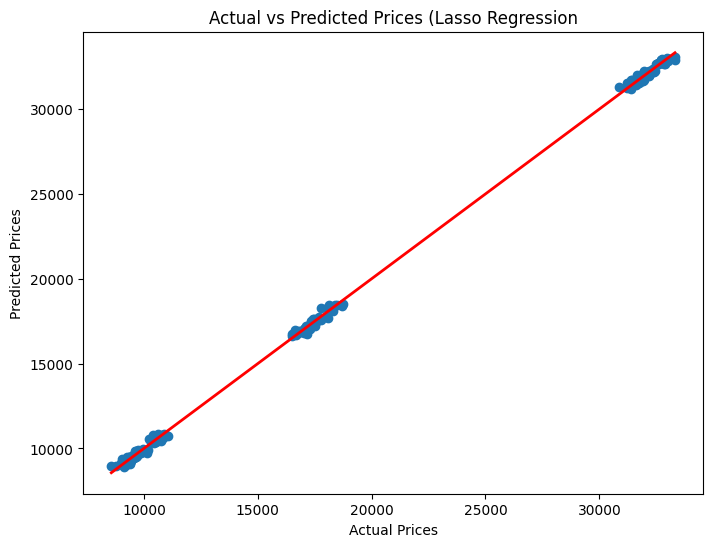

In [12]:
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices ({best_model_name}')
plt.show()